# Health care project
part 2  (Liver Cirrhosis Prediction) Dataset
prepared by Eman Abdallah Yosif Maharik

# Cirrhosis Prediction Dataset
https://www.kaggle.com/code/marianadeem755/navigating-liver-cirrhosis-diagnosing-the-stage?select=liver_cirrhosis.csv

## data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('liver_cirrhosis.csv')

# Explore dataset
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.shape

(25000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [5]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [6]:
#check the data types , nulls ratio and no of categories
d_types = df.dtypes
nulls_ratio = df.isnull().sum()/df.shape[0]
n_unique = df.nunique()
pd.DataFrame({'DTypes': d_types, 'Null_Ratio': nulls_ratio, 'Nunique': n_unique}).T

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
DTypes,int64,object,object,int64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nunique,549,3,2,510,2,2,2,2,3,113,220,179,197,336,240,157,295,51,3


# data Exploration

In [7]:
# Check the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 15361


In [8]:
# Drop the duplicate rows
df = df.drop_duplicates()

In [9]:
df.shape

(9639, 19)

In [ ]:
# Dropping irrelevant columns like Status as it may be atarget 
df.drop(columns=['Status'], inplace=True)


KeyboardInterrupt



In [12]:
# convert N_days into N_years and drop N_days 
df['N_Years'] = (df['N_Days'] / 365.25).round(2)
df.drop(columns=['N_Days'], inplace=True)

# convert Age into Age_year and drop Age
df['Age_years']=(df['Age'] / 365.25) .round(2)
df.drop(columns=['Age'], inplace=True)

In [13]:
missing_values = df.isnull().sum()

In [14]:
print(df.dtypes)

Drug              object
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
N_Years          float64
Age_years        float64
dtype: object


In [15]:
# Handle inconsistencies in categorical features
for col in ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
    print(f"\nUnique values in '{col}': {df[col].unique()}")


Unique values in 'Sex': ['F' 'M']

Unique values in 'Ascites': ['N' 'Y']

Unique values in 'Hepatomegaly': ['Y' 'N']

Unique values in 'Spiders': ['N' 'Y']

Unique values in 'Edema': ['N' 'Y' 'S']


# Visualization

In [16]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'N_Years',
       'Age_years'],
      dtype='object')
Categorical Columns: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


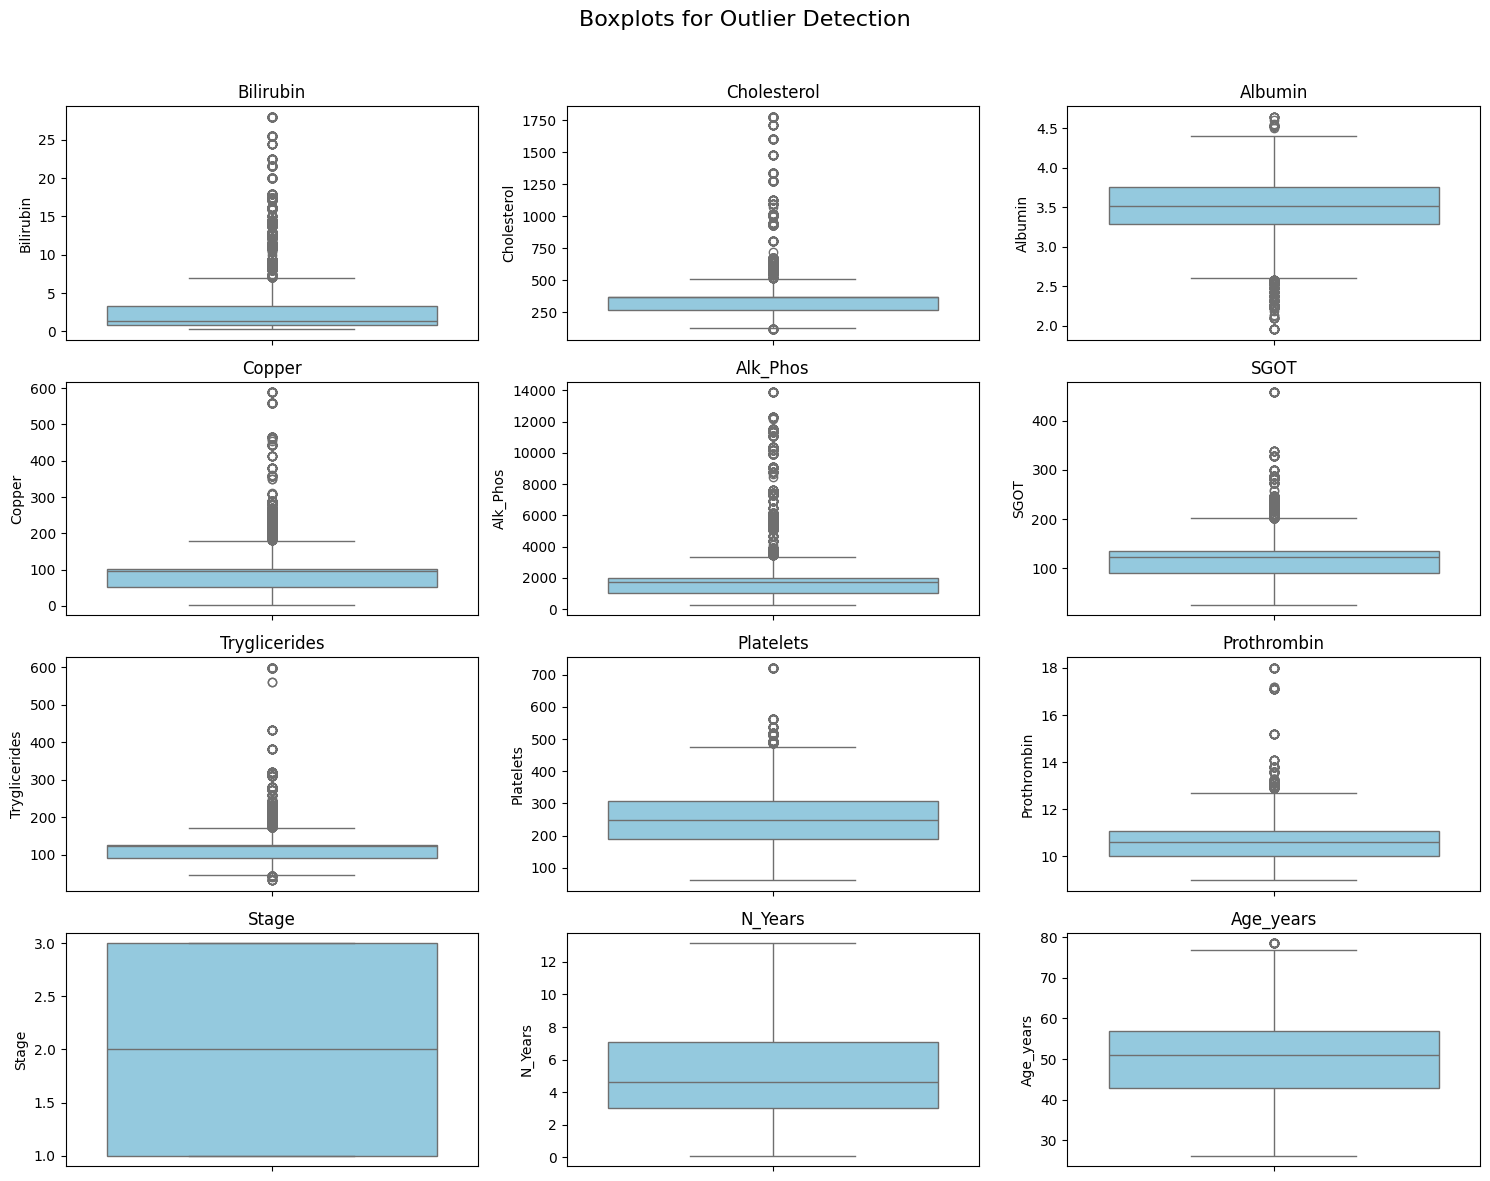

In [17]:
# Create boxplots for numerical columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
# Capping outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

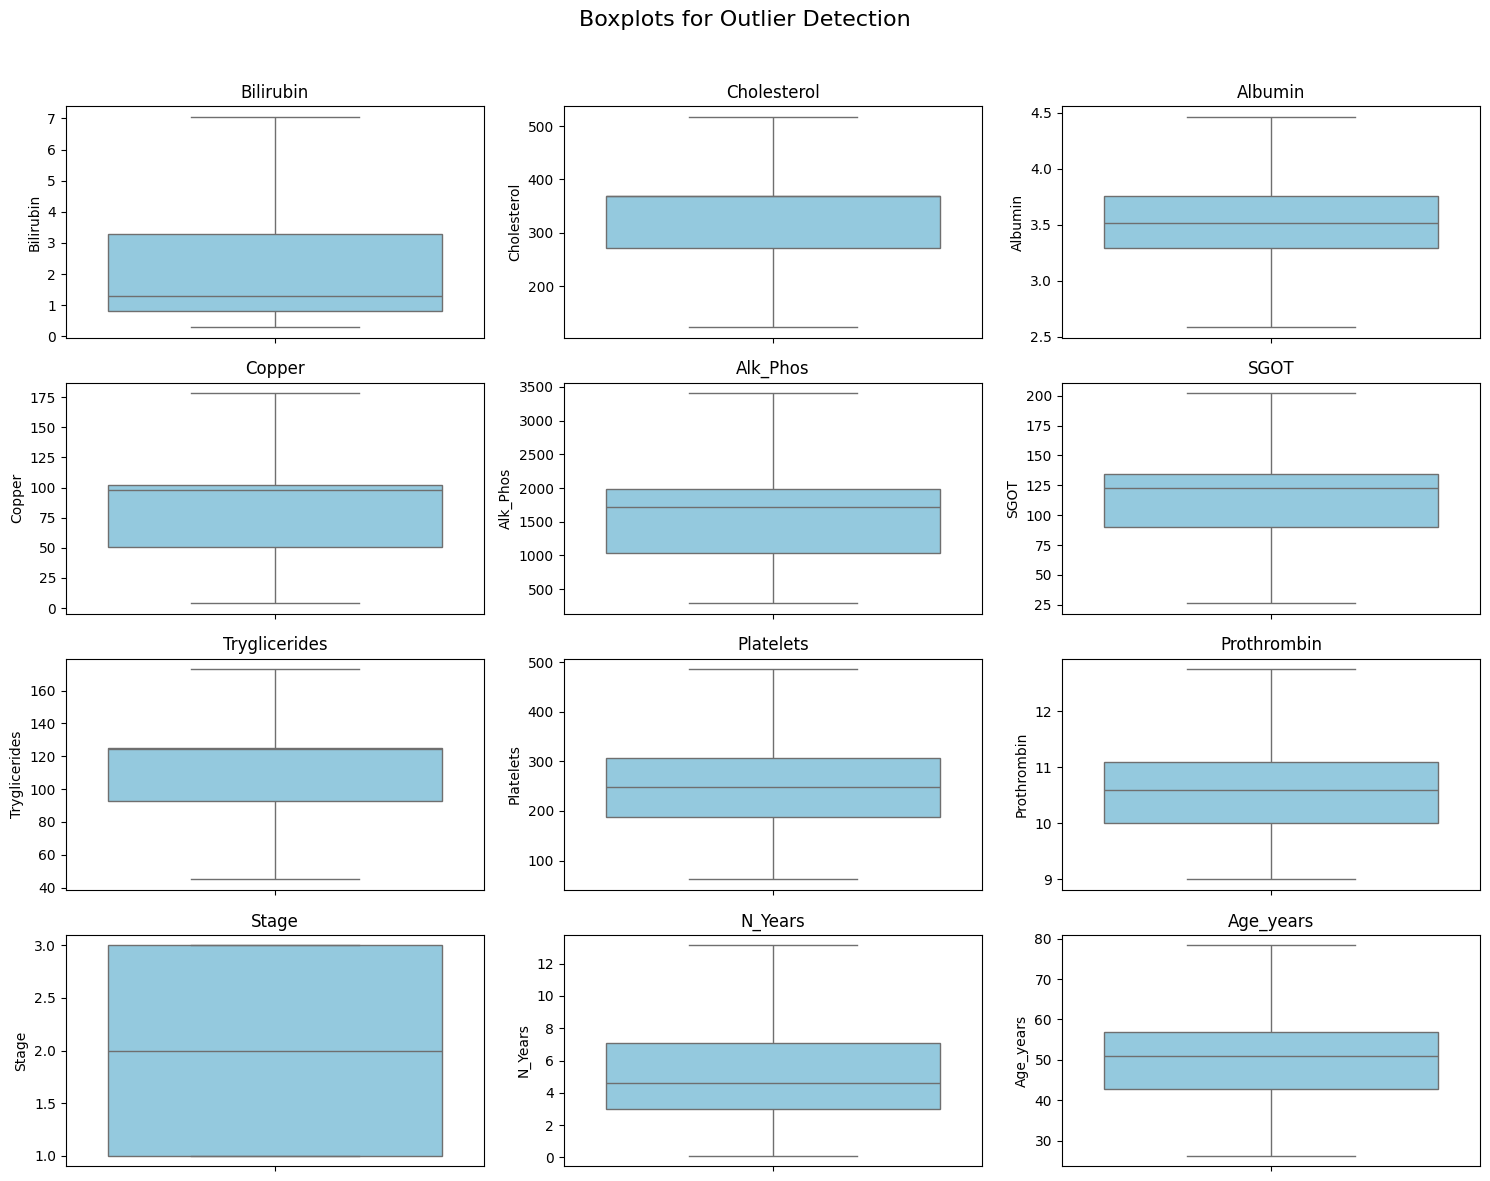

In [19]:
# show chanages 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.boxplot(y=df[col], ax=ax, color="skyblue")
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

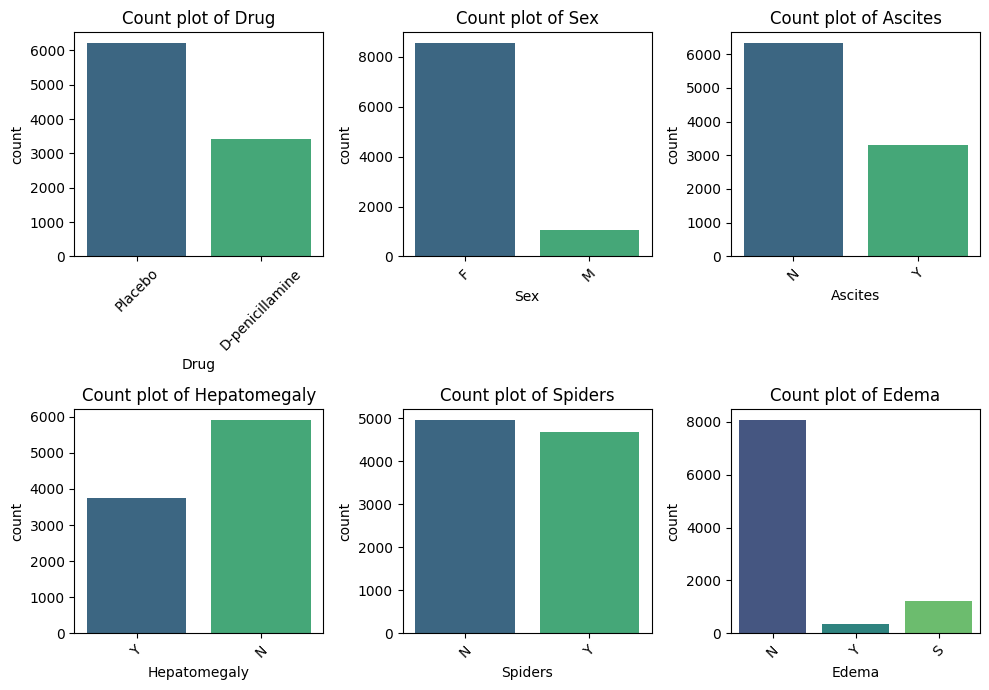

In [20]:
# Loop through each categorical column and plot a countplot
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  # Calculate the number of rows needed
# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 7))
# Flatten the axes array for easier indexing
axes = axes.flatten()
# Loop through each categorical column and plot a countplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col],hue=df[col], palette='viridis', ax=axes[i])
    axes[i].set_title(f"Count plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed for better readability

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

### data information about Target stage

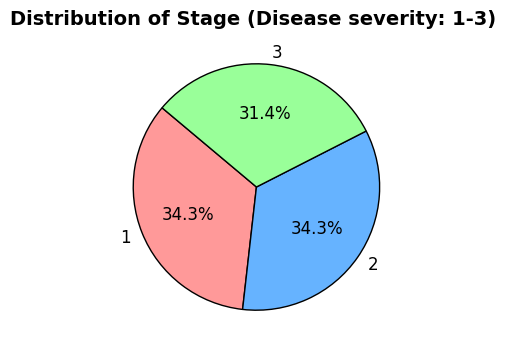

In [22]:
# Calculate class distribution of Target stage
class_distribution = df['Stage'].value_counts(normalize=True) * 100

# Define colors and labels
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors
labels = ['1', '2', '3']

# Create the pie chart with styling
plt.figure(figsize=(4, 4))
plt.pie(class_distribution, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

# Add a title
plt.title('Distribution of Stage (Disease severity: 1-3) ', fontsize=14, fontweight='bold')

# Show the graph
plt.show()

In [23]:
# Group numerical features by 'Stage' and compute descriptive statistics
stage_grouped_summary = df.groupby('Stage')[numerical_cols].describe()
# Output the summary statistics
stage_grouped_summary

Bilirubin                                               Cholesterol  \
          count      mean       std  min  25%  50%  75%   max       count   
Stage                                                                       
1.0      3025.0  1.861405  1.916399  0.3  0.7  1.0  2.1  7.05      3025.0   
2.0      3308.0  2.295556  2.131454  0.3  0.8  1.3  3.0  7.05      3308.0   
3.0      3306.0  3.084982  2.397965  0.3  1.1  2.1  5.1  7.05      3306.0   

                   ... N_Years        Age_years                               \
             mean  ...     75%    max     count       mean        std    min   
Stage              ...                                                         
1.0    337.896977  ...    8.20  13.13    3025.0  49.881769   9.636750  26.38   
2.0    348.605255  ...    7.02  13.13    3308.0  49.104397   9.903295  26.28   
3.0    338.544554  ...    5.77  12.42    3306.0  52.337880  10.462267  26.28   

                                    
         25%    50%    75%     max  
Stage                               
1.0    42.51  50.00  56.45  76.710  
2.0    41.39  49.56  55.42  78.315  
3.0    45.61  53.00  60.66  78.315  

[3 rows x 96 columns]

In [23]:
# Save the cleaned dataset
cleaned_file_path = "Liver Cirrhosis prediction_Cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

## EDA Report ##

**Dataset Overview: Liver Cirrhosis Patients**

The dataset contains 25000 records of patients diagnosed with cirrhosis, with clinical and laboratory features to analyze disease progression.

**General Information**

Number of Rows: 25000

Number of Columns: 19

**Distribution of target stage** 
The bar chart shows the frequency of each category in the Stage column.
Feature Correlation: A heatmap of numerical features was generated .

numbers of records after removing dublictes are 9639

***Target Variable Analysis (Stage)***

"1" (No Cirrhosis)    =  3025

"2" (Early Stage)     =  3308

"3" (Advanced Stage)  =  3306

- The target variable "Stage" represents patient outcomes.
- There are noticeable differences in survival rates based on other features.

***Important clinical and laboratory features to analyze liver cirrhosis disease progression***
1. Bilirubin Levels
2. Albumin Levels
3. Prothrombin
4. Hepatomegaly
5. Edema
6. Platelets
7. N_years

***Conclusion***

- No missing values were detected.
- numbers of rows after removing duplicates: 9639
- Outliers were capped to avoid skewed results.
- Data was cleaned and prepared for machine learning models.
- Important features such as bilirubin, copper, liver disease stage, and albumin significantly impact patient survival.